<a href="https://colab.research.google.com/github/JuuliJ/Machine-learning-and-deep-neural-networks/blob/main/Predict_a_delay_of_airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juliakachanova","key":"04730ca3f36de2ec6ddc57dd7da8e353"}'}

In [ ]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay")

100%|██████████| 6.15M/6.15M [00:00<00:00, 111MB/s]

In [ ]:
df = pd.read_csv('/content/airlines-dataset-to-predict-a-delay/Airlines.csv')
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [ ]:
df.isnull().sum() #рассчет количества пропущенных значений в каждом столбце DataFrame

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

**Определения категорий:**

1. id - уникальный идентификатор строки ID.
2. Airline - сокращенное название различных коммерческих авиакомпаний.
3. Flight - тип используемого воздушного судна.
4. AirportFrom - аэропорт отправления рейса.
5. AirportTo - аэропорт назначения рейса.
6. DayOfWeek - день недели, когда состоялся полет.
7. Time - время полета.
8. Length - длина полета.
9. Delay - задержка.

In [ ]:
df.drop(columns=['id'], inplace=True) #удаляем стобец id, достаточно собственного индекса из pandas
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0
539379,FL,398,SEA,ATL,5,1439,305,0
539380,FL,609,SFO,MKE,5,1439,255,0
539381,UA,78,HNL,SFO,5,1439,313,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
#Кодирование категориальных признаков
le = LabelEncoder() 
for val in df:
    #Кодируем если тип признака object
    if df[val].dtypes=='object':
      df[val]=le.fit_transform(df[val])
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,4,269,253,135,3,15,205,1
1,14,1558,217,60,3,15,222,1
2,1,2400,154,80,3,20,165,1
3,1,2466,253,80,3,20,195,1
4,2,108,14,252,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,4,178,203,264,5,1439,326,0
539379,8,398,252,16,5,1439,305,0
539380,8,609,253,184,5,1439,255,0
539381,13,78,128,253,5,1439,313,1


In [ ]:
X = df.iloc[:, 0:7].values #Выделяем признаки
y = df.iloc[:, 7].values #Выделяем целевую переменную
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # используем метод масштабирования - стандартизацию со следующими параметрами: среднее значение - 0, стандартное отклонение - 1
X = scaler.fit_transform(X) #вычисляем и применяем преобразования к обучающему набору данных с помощью fit_transform

In [ ]:
#Определение важности признаков с помощью классификатора ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

names = ['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time',
       'Length']
extra_tree_forest = ExtraTreesClassifier() #построение модели леса дополнительных деревьев
extra_tree_forest.fit(X, y) #обучение модели
print(extra_tree_forest.feature_importances_) #получение важности каждого признака

[0.1229717  0.14081607 0.08932501 0.08420523 0.18821092 0.21936202
 0.15510906]


In [ ]:
#Представим полученные результаты в более удобном табличном виде
feature_importance = pd.DataFrame(columns = ['Название признака', 'Важность признака'])
feature_importance['Название признака'] = names
feature_importance['Важность признака'] = extra_tree_forest.feature_importances_
# выведем полученную таблицу
feature_importance

,Название признака,Важность признака
0,Airline,0.122972
1,Flight,0.140816
2,AirportFrom,0.089325
3,AirportTo,0.084205
4,DayOfWeek,0.188211
5,Time,0.219362
6,Length,0.155109


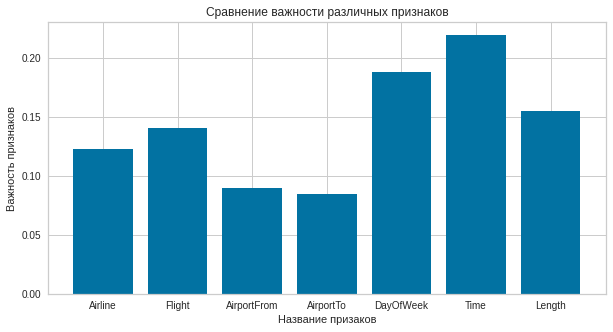

In [ ]:
X = df.iloc[:, 0:7]
plt.figure(figsize = (10,5))
plt.bar(X.columns, extra_tree_forest.feature_importances_) # Построение гистограммы для сравнения результатов
plt.xlabel('Название призаков')
plt.ylabel('Важность признаков')
plt.title('Сравнение важности различных признаков')
plt.show()

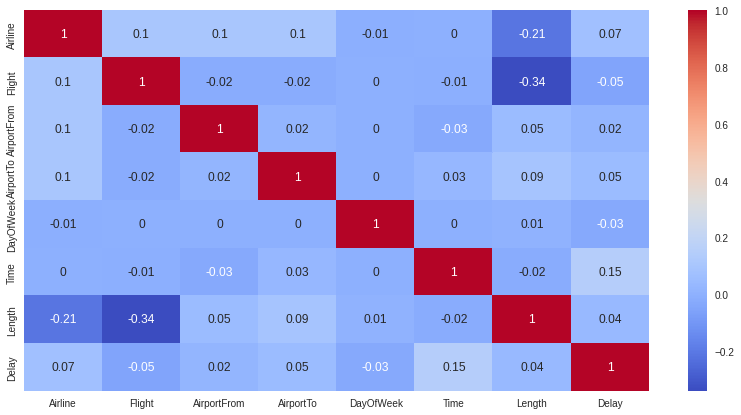

In [ ]:
import seaborn as sns
#проверка корреляции между переменными
plt.figure(figsize = (14,7))
sns.heatmap(df.corr().round(2), annot = True, cmap="coolwarm") #построение тепловой карты

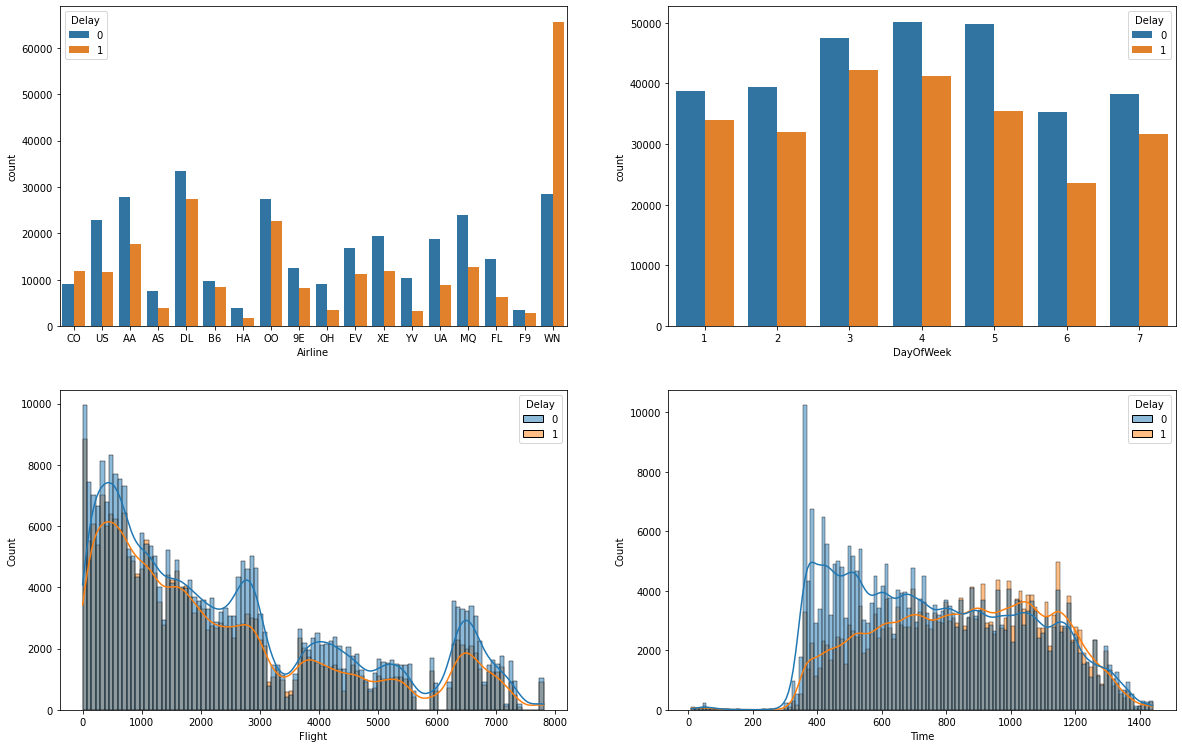

In [ ]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(data=df, x='Airline', hue='Delay') # подсчет и отображение кол-ва задержек для каждой категории - авиакомпании

plt.subplot(3,2,2)
sns.countplot(data=df, x="DayOfWeek",hue='Delay') #Похоже, что день недели не влияет на задержку, но 3, 4 и 5-й дни имеют высокие задержки

plt.subplot(3,2,3)
sns.histplot(data=df, x='Flight', hue='Delay', kde=True) #Построим гистограмму с плотностью распределения данных

plt.subplot(3,2,4)
sns.histplot(data=df, x='Time', hue='Delay', kde=True) #Построим гистограмму с плотностью распределения данных


In [ ]:
import plotly.express as px
dt_AirportFrom = df[['AirportFrom','Delay']].groupby('AirportFrom').agg('count').reset_index()
dt_AirportFrom = dt_AirportFrom.sort_values('Delay', ascending=False)
fig = px.bar(dt_AirportFrom.head(25), x='AirportFrom', y='Delay')
fig.show()

In [ ]:
dt_AirportTo = df[['AirportTo','Delay']].groupby('AirportTo').agg('count').reset_index()
dt_AirportTo = dt_AirportTo.sort_values('Delay', ascending=False)
fig = px.bar(dt_AirportTo.head(20), x='AirportTo', y='Delay')
fig.show()

In [ ]:
df.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

In [ ]:
df.drop(columns=['AirportTo', 'AirportFrom'], inplace=True) #удаляем наименее важные признаки
df

,Airline,Flight,DayOfWeek,Time,Length,Delay
0,CO,269,3,15,205,1
1,US,1558,3,15,222,1
2,AA,2400,3,20,165,1
3,AA,2466,3,20,195,1
4,AS,108,3,30,202,0
...,...,...,...,...,...,...
539378,CO,178,5,1439,326,0
539379,FL,398,5,1439,305,0
539380,FL,609,5,1439,255,0
539381,UA,78,5,1439,313,1


In [ ]:
X_cat = df[['Airline', 'DayOfWeek']] #категориальные данные, которые будут кодироваться get_dummies
X_num = df.drop(['Airline', 'DayOfWeek', 'Delay'], axis=1) #числовые данные, которые буду стандартизированы

X_cat = pd.get_dummies(X_cat, drop_first=True) #используем one hot encoding для категориальных колонок
X_cat

,DayOfWeek,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,Airline_HA,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_WN,Airline_XE,Airline_YV
0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
539379,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
539380,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
539381,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #используем метод масштабирования - стандартизацию со следующими параметрами: среднее значение - 0, стандартное отклонение - 1
X_scaled = scaler.fit_transform(X_num) #для числовых данных вычисляем и применяем преобразования
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1) #конкатенация датафреймов
y = df['Delay']

X.head()

,Flight,Time,Length,DayOfWeek,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,...,Airline_FL,Airline_HA,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_WN,Airline_XE,Airline_YV
0,-1.044258,-2.833092,1.038237,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.420778,-2.833092,1.280689,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.013509,-2.815110,0.467761,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.018415,-2.815110,0.895618,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.122133,-2.779144,0.995451,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train.shape

(377568, 21)

In [ ]:
X_test.shape

(161815, 21)

In [ ]:
from sklearn.linear_model import LogisticRegression
#Реализуем модель линейной регрессии
LogisticRegressionClassifierModel = LogisticRegression(solver='liblinear') #создаем экземпляр модели логистической регерессии
LogisticRegressionClassifierModel.fit(X_train.values, y_train.values) #обучаем модель на обучающих данных
y_LRpred = LogisticRegressionClassifierModel.predict(X_test.values) #прогнозирование результатов тестового набора

0.6320798442666008

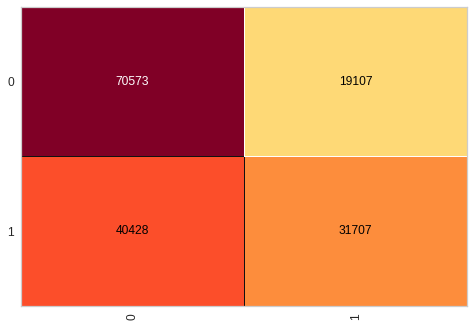

In [ ]:
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(LogisticRegressionClassifierModel) #матрица ошибок модели
cm.fit(X_train.values, y_train.values)
cm.score(X_test.values, y_test.values)

In [ ]:
print("LogisticRegressionClassifierModel Accuracy is:", accuracy_score (y_test, y_LRpred))

LogisticRegressionClassifierModel Accuracy is: 0.6320798442666008


In [ ]:
from sklearn.tree import DecisionTreeClassifier
#реализуем модель дерева решений
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=0) #экземпляр модели дерева решений
DecisionTreeClassifierModel.fit(X_train.values, y_train.values)
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train.values, y_train.values))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test.values, y_test.values))
y_DTpred = DecisionTreeClassifierModel.predict(X_test.values)

DecisionTreeClassifierModel Train Score is :  0.6342883930841596
DecisionTreeClassifierModel Test Score is :  0.6344158452553842


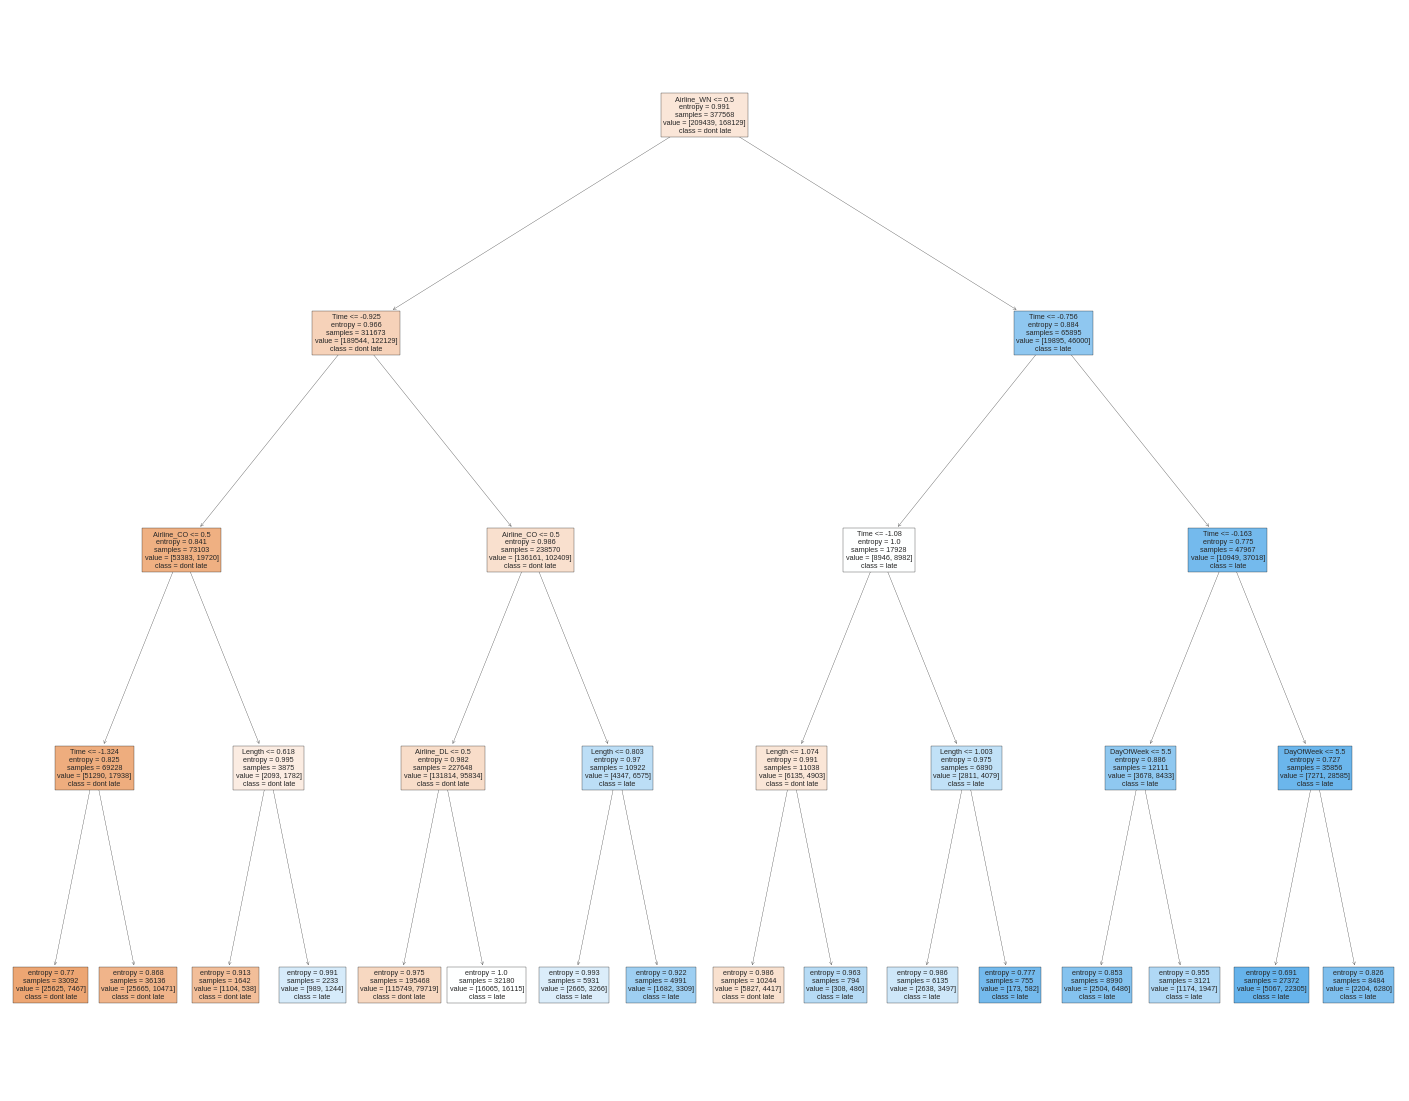

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DecisionTreeClassifierModel, feature_names=X.columns, class_names=['dont late', 'late'], filled=True) #построение дерева решений

In [ ]:
#Cравним фактические выходные значения для X_test с прогнозируемыми значениями
df_tb = pd.DataFrame({'Actual': y_test, 'Predicted': y_DTpred})
df_tb

,Actual,Predicted
21403,0,0
121631,1,0
535153,1,0
415037,0,0
69899,0,0
...,...,...
261666,0,0
186291,0,1
91478,1,0
263406,1,1


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# определение архитектуры модели
NN_model = Sequential()
NN_model.add(Dense(30, activation='relu', input_shape=(21,)))
NN_model.add(Dense(10, activation='relu'))
NN_model.add(Dense(5, activation='relu'))
NN_model.add(Dense(1, activation='sigmoid'))

In [ ]:
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NN_results = NN_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25
10620/10620 [==============================] - 37s 3ms/step - loss: 0.6350 - accuracy: 0.6353 - val_loss: 0.6329 - val_accuracy: 0.6397
Epoch 2/25
10620/10620 [==============================] - 35s 3ms/step - loss: 0.6303 - accuracy: 0.6412 - val_loss: 0.6295 - val_accuracy: 0.6417
Epoch 3/25
10620/10620 [==============================] - 35s 3ms/step - loss: 0.6296 - accuracy: 0.6415 - val_loss: 0.6285 - val_accuracy: 0.6427
Epoch 4/25
10620/10620 [==============================] - 35s 3ms/step - loss: 0.6291 - accuracy: 0.6424 - val_loss: 0.6290 - val_accuracy: 0.6425
Epoch 5/25
10620/10620 [==============================] - 35s 3ms/step - loss: 0.6286 - accuracy: 0.6432 - val_loss: 0.6288 - val_accuracy: 0.6434
Epoch 6/25
10620/10620 [==============================] - 34s 3ms/step - loss: 0.6283 - accuracy: 0.6434 - val_loss: 0.6303 - val_accuracy: 0.6440
Epoch 7/25
10620/10620 [==============================] - 35s 3ms/step - loss: 0.6280 - accuracy: 0.6434 - val_loss: 0

In [ ]:
def visualize_training_results(results):
    #Графические представления точности обучения
    history = results.history
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('ACCURACY', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.show()
    
    #Графическое представление ошибки обучения
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('LOSS', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.show()

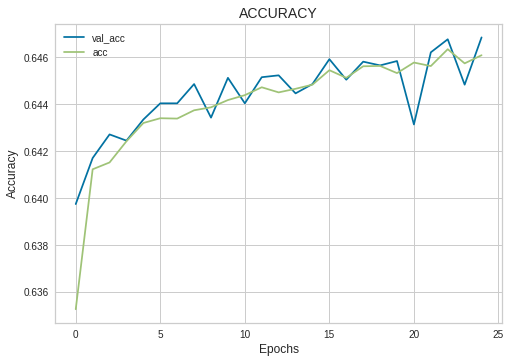

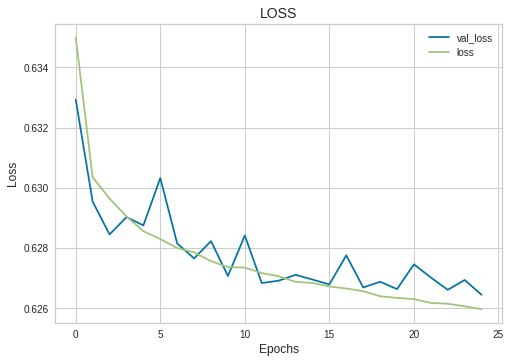

In [ ]:
visualize_training_results(NN_results)

In [ ]:
# Оценим модель на тестовых данных, используя "evaluate"
scores=NN_model.evaluate(X_test,y_test,verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 64.51%
